<a href="https://colab.research.google.com/github/MarcoMarinucci/MLPNS/blob/main/MidtermMarcoMarinucci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn import preprocessing
import pylab as plt
import numpy as np
from sklearn.cluster  import KMeans
import scipy.optimize


plt.rcParams['font.size'] = 18

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)  



Mounted at /content/drive


In [3]:
cd drive/MyDrive/MLPNS

/content/drive/MyDrive/MLPNS


NOTE THAT IS MyDrive, not My\Drive


In [4]:
# rd = raw data
rd = pd.read_excel('country_pop.xls')

In [5]:
rd.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,Last Updated Date,2021-03-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
4,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN


In [6]:
rd.columns


Index(['Data Source', 'World Development Indicators', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56',
       'Unnamed: 57', 'Unnamed: 58', '

In [7]:
#labels = rd.
#labels
#rnd = rd.drop(0)
#rnd = rnd.drop(1)

#countries = 
#rnd = rnd.drop(2)
#rnd.columns = labels

#rnd['Country Name']
#rnd.index = rnd['Country Name']
#rnd.head()

In [10]:
#datain = pd.DataFrame(columns = len(labels))
#datain.columns = labels
#datain[labels] = rnd['Data Source']

In [12]:
#rd.iloc[0,0]

In [13]:
rd['Data Source'][-pd.isna(rd['Data Source'])]

0      Last Updated Date
2           Country Name
3                  Aruba
4            Afghanistan
5                 Angola
             ...        
262               Kosovo
263          Yemen, Rep.
264         South Africa
265               Zambia
266             Zimbabwe
Name: Data Source, Length: 266, dtype: object

In [14]:
rd.shape

(267, 65)

In [15]:
#rnd

In [17]:
datain = pd.read_csv('https://raw.githubusercontent.com/fedhere/MLPNS2021/main/midterm/country_pop.csv')


In [18]:
datain.head()

,Data Source,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
0,Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
1,Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN
2,Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN
3,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN
4,Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN


In [19]:
print("there are {} countries and {} time stamps in the data".
      format(*datain.shape))

there are 264 countries and 62 time stamps in the data


In [20]:
#datain.index = datain['Data Source']

In [21]:
datain['Data Source'].dropna()

0             Aruba
1       Afghanistan
2            Angola
3           Albania
4           Andorra
           ...     
259          Kosovo
260     Yemen, Rep.
261    South Africa
262          Zambia
263        Zimbabwe
Name: Data Source, Length: 264, dtype: object

In [22]:
dataclean = pd.read_csv('https://raw.githubusercontent.com/fedhere/MLPNS2021/main/midterm/country_pop_clean.csv')
dataclean.head()

,Data Source,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
0,Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
1,Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
2,Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
3,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
4,Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0


In [23]:
len(dataclean.columns[1:])

60

In [24]:
#plt.plot(,dataclean.iloc[0][1:])
dates = np.array([float(dataclean.columns[1:][i]) for i in range(len(dataclean.columns[1:]))])

In [25]:
coun = dataclean['Data Source']
countries = {}
for (i,j) in enumerate(coun):
  countries[i] = j

Text(0.5, 0, 'year')

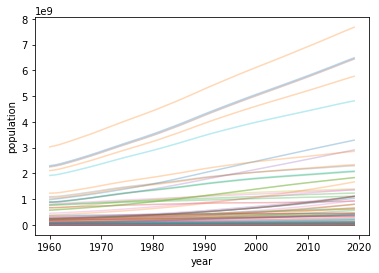

In [26]:
for i in range(len(coun)):
  plt.plot(dates,dataclean.iloc[i][1:], label = countries[i], alpha = 0.3)

plt.ylabel('population')
plt.xlabel('year')
#plt.legend()

Fig. 1 
Plot showing the population variation for different nations from 1960 to 2019. We can see a general growing trend in each nation. The growing rate is better understood looking at Fig. 2 (see below).

Text(0.5, 0, 'year')

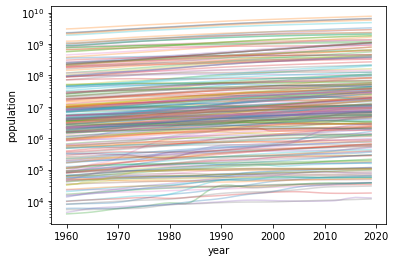

In [27]:
for i in range(len(coun)):
  plt.plot(dates,dataclean.iloc[i][1:], label = countries[i], alpha = 0.3)

plt.yscale('log')
plt.ylabel('population')
plt.xlabel('year')
#plt.legend()

Fig. 2.
Same as Fig. 1 but with a logarithmic scale in the population axes. We can see a general growing trend which seems to follow a scaling law. We also see some nations (4 or 5) with a non scale-law behavior.

In [28]:
dataclean1 = pd.read_csv('https://raw.githubusercontent.com/fedhere/MLPNS2021/main/midterm/country_pop_clean.csv', index_col = 0)
dataclean1.head()

,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
Data Source,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0


# Standardization

In [29]:
#dataclean1.shape
for i in range(dataclean1.shape[0]):
  dataclean1.iloc[i] = dataclean1.iloc[i].values - dataclean1.iloc[i].mean()
  dataclean1.iloc[i] = dataclean1.iloc[i].values/(dataclean1.iloc[i].std())


# Check the standardization, all the means should be 0 and the std should be 1.

In [32]:
for i in range(dataclean1.shape[0]):
  print(dataclean1.iloc[i].mean(), dataclean1.iloc[i].std())

1.3692750637043598e-16 1.0
1.7023419710919068e-16 1.0
-4.4408920985006264e-17 0.9999999999999997
3.0716170347962664e-16 0.9999999999999999
9.62193288008469e-17 0.9999999999999999
1.887379141862766e-16 0.9999999999999999
-8.141635513917814e-17 1.0
1.887379141862766e-16 0.9999999999999998
-3.885780586188048e-16 1.0000000000000004
8.511709855459534e-17 1.0000000000000002
-3.182639337258782e-16 1.0
1.887379141862766e-16 1.0
-6.439293542825908e-16 0.9999999999999998
-2.7385501274087196e-16 0.9999999999999997
3.182639337258782e-16 0.9999999999999999
9.177843670234628e-16 1.0
1.924386576016938e-16 0.9999999999999999
1.9984014443252818e-16 1.0
2.1464311809419693e-16 0.9999999999999998
-4.810966440042345e-16 1.0
5.181040781584064e-17 0.9999999999999999
-8.141635513917814e-17 0.9999999999999999
-4.699944137579829e-16 0.9999999999999998
6.346774957440478e-16 1.0000000000000002
1.258252761241844e-16 1.0
3.478698810492157e-16 0.9999999999999998
2.4054832200211723e-16 0.9999999999999998
-1.591319668

In [33]:
dataclean1.head()

,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
Data Source,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,-1.145215,-1.081510,-1.040650,-1.016248,-0.998751,-0.981721,-0.963290,-0.945637,-0.928452,-0.910800,-0.893303,-0.873729,-0.852962,-0.832038,-0.817241,-0.810544,-0.814230,-0.825652,-0.839307,-0.845693,-0.839670,-0.815216,-0.774823,-0.730380,-0.697412,-0.687547,-0.707380,-0.749487,-0.788634,-0.791074,-0.733080,-0.604684,-0.417100,-0.195457,0.022396,0.210551,0.359871,0.476741,0.571546,0.661262,0.757209,0.863384,0.972102,1.077239,1.166540,1.233723,1.275414,1.295559,1.302620,1.307656,1.318767,1.338341,1.365027,1.396127,1.428057,1.457495,1.485064,1.510712,1.535582,1.559932
Afghanistan,-1.075473,-1.055671,-1.034767,-1.012746,-0.989597,-0.965305,-0.940211,-0.914363,-0.887131,-0.857651,-0.825513,-0.790855,-0.754593,-0.718104,-0.683195,-0.651476,-0.622316,-0.596109,-0.576599,-0.568577,-0.574840,-0.596066,-0.629271,-0.668866,-0.707157,-0.737713,-0.760913,-0.776031,-0.774484,-0.745674,-0.683269,-0.581443,-0.445186,-0.292333,-0.147740,-0.028893,0.056405,0.114247,0.157958,0.207691,0.277639,0.372612,0.486734,0.610769,0.730866,0.837387,0.926818,1.003470,1.074868,1.152099,1.242899,1.349916,1.469801,1.597063,1.723521,1.843274,1.954610,2.059487,2.160081,2.259916
Angola,-1.071226,-1.061428,-1.051562,-1.042484,-1.035369,-1.030821,-1.029458,-1.030351,-1.030682,-1.026637,-1.015486,-0.996232,-0.969634,-0.937835,-0.903987,-0.870369,-0.837662,-0.805118,-0.772223,-0.737998,-0.701743,-0.663448,-0.623444,-0.581822,-0.538727,-0.494276,-0.448434,-0.401181,-0.352690,-0.303185,-0.252800,-0.201530,-0.149242,-0.095774,-0.040897,0.015614,0.073925,0.134198,0.196671,0.261607,0.329273,0.399714,0.473149,0.550219,0.631719,0.718184,0.809878,0.906584,1.007747,1.112542,1.220322,1.330976,1.444555,1.560769,1.679306,1.799968,1.922615,2.047331,2.174446,2.304445
Albania,-2.289928,-2.183710,-2.076411,-1.969564,-1.862276,-1.756774,-1.653093,-1.546823,-1.428788,-1.305027,-1.193011,-1.083932,-0.968814,-0.857127,-0.745969,-0.632030,-0.520200,-0.405609,-0.295809,-0.188412,-0.075603,0.036986,0.158246,0.282546,0.408485,0.534141,0.654673,0.781655,0.903975,1.082269,1.204313,1.163176,1.122040,1.080903,1.039767,0.998630,0.957494,0.916356,0.875221,0.834083,0.792948,0.732854,0.713770,0.690039,0.663637,0.631455,0.592009,0.545085,0.497802,0.456574,0.426379,0.410080,0.400096,0.389039,0.376567,0.359070,0.349486,0.343979,0.329232,0.303854
Andorra,-1.620691,-1.579723,-1.537439,-1.493156,-1.448237,-1.402340,-1.355678,-1.308463,-1.260356,-1.210720,-1.158958,-1.104434,-1.047785,-0.990839,-0.936102,-0.885743,-0.840186,-0.797944,-0.756891,-0.710952,-0.657873,-0.596974,-0.528383,-0.453886,-0.375733,-0.295243,-0.213776,-0.131416,-0.047314,0.038275,0.125862,0.217741,0.311958,0.400479,0.472980,0.522829,0.544503,0.543100,0.535238,0.544928,0.588275,0.671187,0.786270,0.919414,1.049540,1.161011,1.251360,1.323223,1.373284,1.398825,1.398230,1.368397,1.312301,1.242053,1.175715,1.124633,1.094290,1.081711,1.081923,1.087703


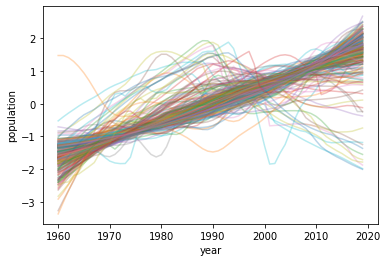

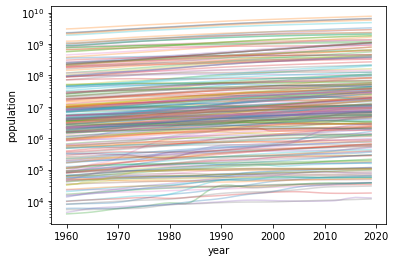

In [199]:
for i in range(len(coun)):
  plt.plot(dates,dataclean1.iloc[i], label = countries[i], alpha = 0.3)



plt.ylabel('population')
plt.xlabel('year')
#plt.legend()
plt.show()

for i in range(len(coun)):
  plt.plot(dates,dataclean.iloc[i][1:], label = countries[i], alpha = 0.3)

plt.yscale('log')
plt.ylabel('population')
plt.xlabel('year')
#plt.legend()
plt.show()

Fig. 3.
(Upper plot) same as Fig.1, but for normalized data. Using normalized data highlights that all the nations seems to follow (almost) the same growing behavior.
(Below) Same as Fig. 2, but with normalized data.

In [34]:
def model(x, a, b, c):
  return a * x**2 + b * x + c

def L2(theta,y,x):
  a,b,c = theta
  return np.sum((y - model(x,a,b,c))**2)

In [35]:
from scipy.optimize import minimize


In [36]:
avals = np.zeros(dataclean1.shape[0])
bvals = np.zeros(dataclean1.shape[0])
cvals = np.zeros(dataclean1.shape[0])

In [37]:
dataclean1.iloc[0].values

array([-1.14521491, -1.08151004, -1.04064962, -1.01624759, -0.99875081,
       -0.98172131, -0.96328999, -0.94563746, -0.9284522 , -0.91079967,
       -0.8933029 , -0.87372936, -0.85296167, -0.83203823, -0.81724125,
       -0.81054368, -0.81422994, -0.82565217, -0.83930692, -0.84569298,
       -0.83967035, -0.8152164 , -0.77482326, -0.73038042, -0.69741172,
       -0.68754707, -0.7073802 , -0.74948668, -0.78863377, -0.79107397,
       -0.73308021, -0.60468401, -0.4170999 , -0.19545679,  0.02239622,
        0.21055144,  0.35987108,  0.47674123,  0.57154571,  0.6612621 ,
        0.7572088 ,  0.86338359,  0.97210241,  1.07723881,  1.16653986,
        1.23372332,  1.27541444,  1.29555909,  1.30262011,  1.30765627,
        1.31876698,  1.33834052,  1.365027  ,  1.39612661,  1.42805692,
        1.45749511,  1.48506421,  1.5107123 ,  1.5355816 ,  1.55993171])

In [38]:
initialGuess = [1e-5,1e-1,0.1]

x = np.arange(0,len(dates),1)

l2Solution = minimize(L2, initialGuess, args=(dataclean1.iloc[1].values, x))
l2Solution.x

array([ 0.00128417, -0.02273938, -0.8318934 ])

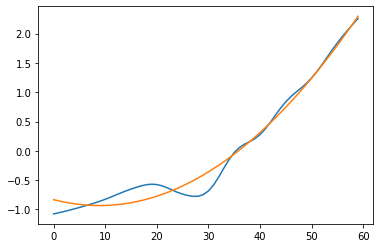

In [39]:
plt.plot(x,dataclean1.iloc[1].values)
#plt.plot(dates,model(dates,1e-8,1e-1,-200))
plt.plot(x,model(x,l2Solution.x[0],l2Solution.x[1],l2Solution.x[2]))

In [40]:
#l2Solution = minimize(L2, initialGuess, args=(dataV, timeV))
fitparams = []
for i in range(dataclean1.shape[0]):
  solution = minimize(L2, initialGuess, args=(dataclean1.iloc[i].values, x))
  fitparams.append(solution.x)

fitparams=np.array(fitparams)

In [41]:
fitparams[:,0]

array([ 8.05759238e-04,  1.28416596e-03,  1.04089521e-03, -2.25965933e-03,
       -3.14076072e-04,  4.88090452e-04,  1.37841390e-03,  5.09929402e-05,
       -2.84378309e-03, -7.53758680e-04,  1.22225865e-03,  2.57426357e-04,
        6.37599238e-04, -6.66956774e-05,  9.10840789e-04,  8.05990739e-04,
        8.92641130e-04,  9.91649421e-04,  1.31837495e-04, -2.59810795e-03,
        1.17090336e-03, -1.00895696e-05, -3.21210791e-03, -2.93180831e-03,
        7.95428160e-04, -5.29052342e-04,  3.78065259e-04, -1.59755019e-04,
       -1.08543962e-04, -1.85575607e-05, -1.17181455e-04,  2.68089875e-04,
        3.39706063e-04,  3.88669960e-05, -3.06351429e-03,  5.00839960e-04,
        1.35777962e-04,  1.00620847e-04, -5.64690135e-04,  4.49987556e-04,
        7.40950356e-04,  9.18611148e-04,  7.99733320e-04,  1.75009885e-05,
        6.51311834e-04,  4.26192663e-04,  1.05671965e-04, -2.43191425e-04,
       -1.23144879e-03, -3.04094028e-04,  6.98269007e-04,  6.71522117e-04,
       -9.30041540e-04, -

In [42]:
fitparams[0]

array([ 8.05759238e-04,  6.27846037e-03, -1.12810177e+00])

In [43]:
avals = fitparams[:,0]
bvals = fitparams[:,1]
cvals = fitparams[:,2]

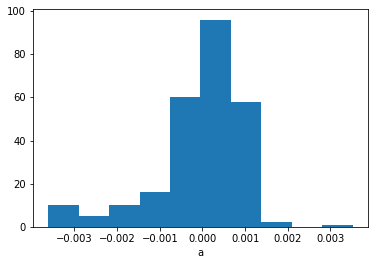

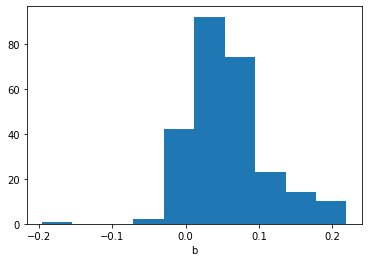

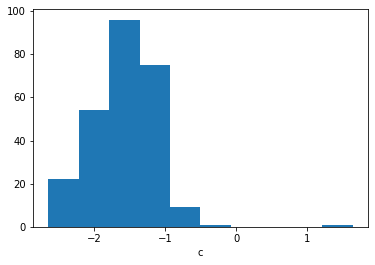

In [45]:
plt.hist(avals)
plt.xlabel('a')
plt.show()

plt.hist(bvals)
plt.xlabel('b')
plt.show()

plt.hist(cvals)
plt.xlabel('c')
plt.show()

Fig. 4
Histogram plots for the fit values.